# Tarea 1



In [14]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
import pandas_datareader as pdr
%matplotlib inline

In [15]:
import scipy.stats as stats
from scipy.stats import kurtosis 
from scipy.stats import skew
import pylab as p 

import random
import math
import scipy.integrate as integrate
import scipy

## Tesla

In [16]:
#Extracción data de Activo riesgoso --> Tesla 
start=datetime.datetime(2018,1,1)
end=datetime.datetime(2021,1,1)
dataTesla=pdr.get_data_yahoo('TSLA', start, end)['Adj Close']
dataTesla.head()

Date
2018-01-02    64.106003
2018-01-03    63.450001
2018-01-04    62.924000
2018-01-05    63.316002
2018-01-08    67.281998
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

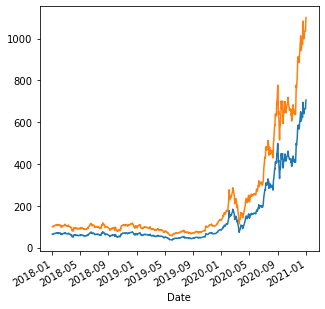

In [17]:
#Gráficos
dataTesla.plot(figsize=(5,5))
(dataTesla/dataTesla.iloc[0]*100).plot(figsize=(5,5))


In [18]:
#Calculo de los Log-rendimientos 
log_retsTesla=np.log(dataTesla/dataTesla.shift(1))
log_retsTesla2=log_retsTesla.drop(log_retsTesla.index[0]) #elimina 1er renglon
log_retsTesla2.head()

Date
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
2018-01-09   -0.008118
Name: Adj Close, dtype: float64

In [19]:
#Calculo de las pruebas
skew_logretTesla = log_retsTesla2.skew()
print(skew_logretTesla)

-0.23097814099562133


In [8]:
kurt_logretTesla = log_retsTesla2.kurt()
print(kurt_logretTesla)

4.645585162563661


In [81]:
log_retsTesla2.describe()

count    755.000000
mean       0.003177
std        0.042892
min       -0.236518
25%       -0.017672
50%        0.002176
75%        0.022420
max        0.181445
Name: Adj Close, dtype: float64

In [20]:
##Prueba T test media cero.
stats.ttest_1samp(a=log_retsTesla2,popmean=log_retsTesla2.mean())   # All data mean

Ttest_1sampResult(statistic=5.55643420507396e-16, pvalue=0.9999999999999996)

In [105]:
#Prueba de Sesgo
t3=skew_logretTesla/np.sqrt(6/T)
##P valor
p_value = scipy.stats.norm.sf(abs(t3))*2
print(t3)
print('pvalue: ' + str(p_value))

-2.5910078708691016
pvalue: 0.00956953028065903


In [104]:
# Prueba Kurtosis
s4 = kurt_logretTesla/np.sqrt(24/T)
print(s4)

t4=s4/np.sqrt(24/T)
print(t4)
##P valor
p_value_k = scipy.stats.norm.sf(abs(t4))*2
print('pvalue: ' + str(p_value_k))

26.056032118691572
146.14236657231515
pvalue: 0.0


In [107]:
## Prueba normalidad  # Null rechazada: The null hypothesis of the test: the data is normally distributed
stats.shapiro(log_retsTesla2)
print('pvalue: ' + str(stats.shapiro(log_retsTesla2).pvalue))

pvalue: 9.931343433319383e-19


## Bono (BND)

In [4]:
#Extracción data de Activo no riesgoso --> BND
start=datetime.datetime(2018,1,1)
end=datetime.datetime(2021,1,1)
dataBND=pdr.get_data_yahoo('BND', start, end)['Adj Close']
dataBND.head()

Date
2018-01-02    74.809769
2018-01-03    74.874153
2018-01-04    74.837372
2018-01-05    74.736206
2018-01-08    74.745399
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

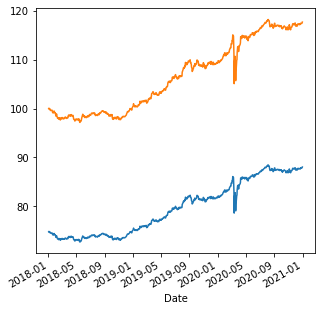

In [5]:
#Gráficos
dataBND.plot(figsize=(5,5))
(dataBND/dataBND.iloc[0]*100).plot(figsize=(5,5))

In [6]:
#Calculo de los Log-rendimientos 
log_retsBND=np.log(dataBND/dataBND.shift(1))
log_retsBND2=log_retsBND.drop(log_retsBND.index[0]) #elimina 1er renglon
log_retsBND2.head()

Date
2018-01-03    0.000860
2018-01-04   -0.000491
2018-01-05   -0.001353
2018-01-08    0.000123
2018-01-09   -0.002957
Name: Adj Close, dtype: float64

In [8]:
#Calculo de las pruebas
skew_logretBND = log_retsBND2.skew()
print(skew_logretBND)

-3.1488503461604473


In [11]:
kurt_logretBND = log_retsBND2.kurt()
print(kurt_logretBND)

93.71093680995588


In [12]:
log_retsBND2.describe()

count    755.000000
mean       0.000216
std        0.003725
min       -0.055920
25%       -0.000999
50%        0.000255
75%        0.001483
max        0.041335
Name: Adj Close, dtype: float64

In [10]:
##Prueba T test media cero.
stats.ttest_1samp(a=log_retsBND2,popmean=log_retsBND2.mean())   # All data mean


Ttest_1sampResult(statistic=1.599451016484498e-15, pvalue=0.9999999999999988)

In [116]:
#Prueba de Sesgo
t3=skew_logretBND/np.sqrt(6/T)
##P valor
p_value = scipy.stats.norm.sf(abs(t3))*2
print(t3)
print('pvalue: ' + str(p_value))

-35.32237291339737
pvalue: 2.6634132239009903e-273


In [119]:
# Prueba Kurtosis
s4 = kurt_logretBND/np.sqrt(24/T)
print(s4)

t4=s4/np.sqrt(24/T)
print(t4)
##P valor
p_value_k = scipy.stats.norm.sf(abs(t4))*2
print('pvalue: ' + str(p_value_k))

525.6033618906725
2947.9898871465284
pvalue: 0.0


In [120]:
## Prueba normalidad  # Null rechazada: The null hypothesis of the test: the data is normally distributed
stats.shapiro(log_retsBND2)
print('pvalue: ' + str(stats.shapiro(log_retsBND2).pvalue))

pvalue: 8.144668973302632e-40


## Comparación Graficos

In [124]:
##Grafica de sus densidades, 
mu, sigma = 0, 0.019 # mean and standard deviation
norm_data = np.random.normal(mu, sigma, 755)
skewed_data = np.random.normal(mu, sigma, 755)+0.02
my_data1 = log_retsTesla2
my_data2 = log_retsBND2

data_df = pd.DataFrame({"Norm":norm_data,
                       "Norm SesgoDer":skewed_data,   
                        "Rt_Tesla":my_data1,
                        "Rt_BND":my_data2,

                       })

<AxesSubplot:ylabel='Density'>

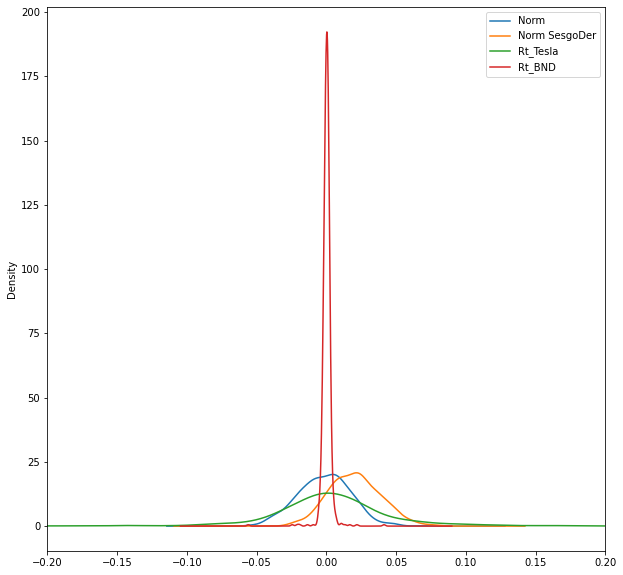

In [125]:
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-0.2,0.2))
